# Evolutionäre Algorithmen


In [8]:
import time
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
is_ipython = 'inline' in matplotlib.get_backend()

if is_ipython:
    from IPython import display

### Grundbegriffe [Kruse, Rudolf, et al. Computational intelligence. Vieweg+ Teubner Verlag, 2011.]

Seite 168

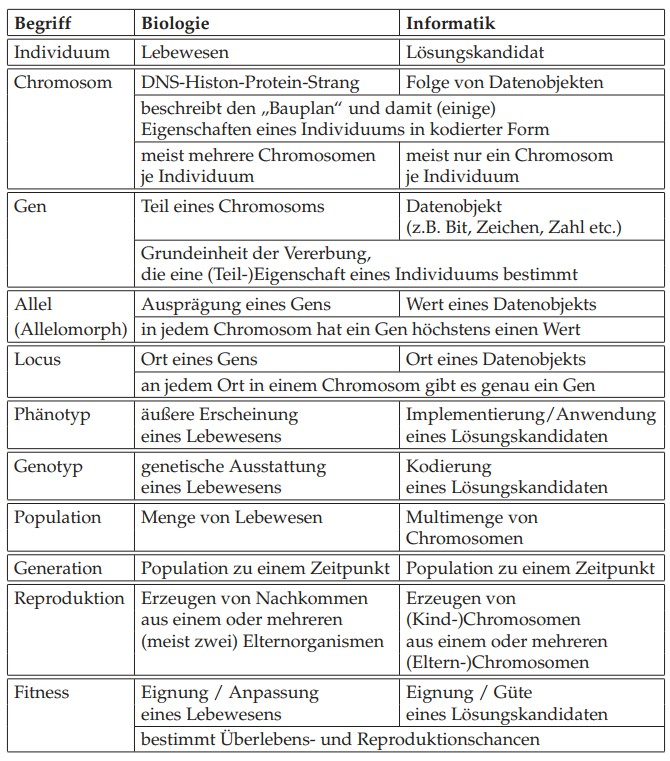

# 2D Optimierung: Finde das maximum

Programmieren Sie einen evolutionären Algorithmus mit Hilfe der vorgestellen Elemente aus der Vorlesung und finden Sie eine gute Lösung für das folgende Problem:

- Finde das Maximum der Funktion der folgende Funktion:

$$
f(x) = \sin(10x) \cdot x + \cos(2x) \cdot x
$$


- Die Funktion zur Berechnung des Funktionswerts soll als Parameter dem EA übergeben werden

In [9]:
# Schwingungen

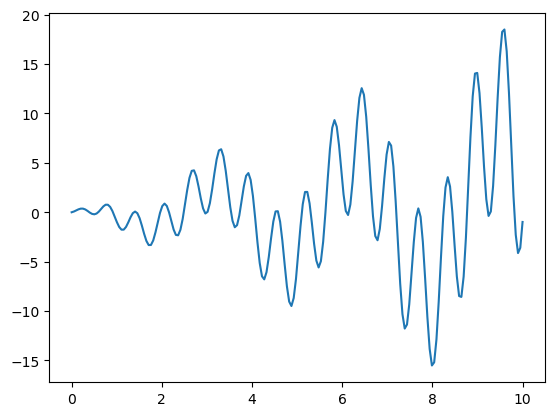

In [10]:
def F_2D(x): return np.sin(10*x)*x + np.cos(2*x)*x     

X_BOUND_2D = [0, 10]      # obere und untere Schranken für x
x = np.linspace(*X_BOUND_2D, 200)
plt.plot(x, F_2D(x))
plt.show()

### Adressieren Sie hierbei die folgenden Punkte:

 - Finden einer geeigneten Repräsentation des Problems
 > Beispielsweise durch eine binäre 10 bit DNA Kodierung
 
| Binary Position | Dezimal Wert |
|-------------------|---------------|
| 2^9               | 512           |
| 2^8               | 256           |
| 2^7               | 128           |
| 2^6               | 64            |
| 2^5               | 32            |
| 2^4               | 16            |
| 2^3               | 8             |
| 2^2               | 4             |
| 2^1               | 2             |
| 2^0               | 1             |
 
 - Finden einer geeigneten Initialisierung
 
 > `np.random.randint`
 
 - Berechnung der Fitness einer konkreten Repräsentation
 
> hint (positiven Fitness-Wert):

> $$ \text{Fitness}(y) = (y + 1 \times 10^{-3}) - \min(y) $$

> Dies setzt voraus, dass $y$ eine Variable ist, die die Eingabe für die Funktion darstellt, und die Funktion berechnet die Fitness als die Summe von $y$ und $1$ $\times 10^{-3}$, abzüglich des Minimalwertes von $y$. 
 
 
 - Selektion der Individuen
 
 > Hint: `np.random.choice`
 
 - Rekombination der ausgewählten Elternindividuen
 - Mutation von Individuen
 - Wiedereinfügen in den Pool
 - Finden eines Abbruchkriteriums

## Genetischer Algorithmus (GA)

In [11]:
class GeneticAlgorithm:
    def __init__(self, dna_size, pop_size, cross_rate, mutation_rate, bound, n_generations, func):
        
        """
        Initialize a GeneticAlgorithm object.

        Args:
            dna_size (int): The size of the DNA for each individual in the population.
            pop_size (int): The size of the population.
            cross_rate (float): The crossover rate for genetic crossover.
            mutation_rate (float): The mutation rate for genetic mutation.
            bound (tuple): A tuple representing the lower and upper bounds of the search space.
            n_generations (int): The number of generations for the evolutionary algorithm.
            func (function): The fitness function to optimize.

        Returns:
            None
        """
        
        self.dna_size = dna_size 
        self.pop_size = pop_size
        self.cross_rate = cross_rate  
        self.mutation_rate = mutation_rate 
        self.bound = bound 
        self.n_generations = n_generations 
        self.F = func 
        
    def initialization(self):
        """
        Perform population initialization by generating random binary DNA.

        Returns:
            ndarray: The initialized population of binary DNA.
        """
        ### Solution ###
        pop = np.random.randint(2, size=(self.pop_size, self.dna_size))
        return pop
    
    def translateDNA_2D(self, pop, bounds):
        """
        Convert binary DNA to decimal and normalize it to a given range.

        Args:
            pop (ndarray): The population of binary DNA.
            bounds (list): Range of values [lower_bound, upper_bound]

        Returns:
            ndarray: The normalized decimal values.
        """
        decimal_val = pop.dot(2 ** np.arange(self.dna_size)[::-1])  # convert binary to decimal
        normalized_val = decimal_val / (2**self.dna_size - 1) * bounds[1]  # normalize to [0, self.bound[1]]
        return normalized_val
    
    def get_fitness(self, pred): 
        """
        Calculate the fitness of the population.

        Args:
            pred (ndarray): The predicted values for fitness calculation.

        Returns:
            ndarray: The calculated fitness values.
        """
        
        ### Solution ###
        
        fitness =  (pred + 1e-3) - np.min(pred)
        
        return fitness

    def select(self, pop, fitness):
        """
        Perform nature selection of individuals from the population based on fitness.

        Args:
            pop (ndarray): The population of individuals.
            fitness (ndarray): The fitness values of the individuals.

        Returns:
            ndarray: The selected individuals from the population.
        """
        
        ### Solution ###
        
        fit = fitness / fitness.sum()
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace = True, p = fit) # Ziehen mit Zurücklegen
        # 下课看一下np.random.choice
        return pop[idx]

    def crossover(self, parent, pop):     # mating process (genes crossover)
        """
        Perform crossover operation between `parent` and a randomly selected individual from `pop` with a crossover rate of `self.cross_rate`.

        Args:
            parent (ndarray): The parent individual's DNA. (with size = 10 here)
            pop (ndarray): The population of individuals.

        Returns:
            ndarray: The DNA of the child produced by the crossover operation.
        """
        
        ### Solution ###
        
        ### Single-Point Crossover ###
        
        if np.random.rand() < self.cross_rate:
            other = np.random.randint(self.pop_size)
            position = np.random.randint(self.dna_size)
            other_parent = pop[other]
            child = np.append(parent[0:position], other_parent[position:])
            return child
        else:
            return parent
        

    def mutate(self, child):
        
        """
        Perform mutation on a child individual.

        Args:
            child (ndarray): The DNA of the child individual.

        Returns:
            ndarray: The mutated child DNA.
        """
        ### Solution ###
        
        for point in range(self.dna_size):
            if np.random.rand() < self.mutation_rate:
                child[point] = 1 - child[point]
            
        return child

    def evolution_2D(self, is_ipython=False):
        """
        Perform evolutionary algorithm for optimization in a 2D search space.

        Args:
            is_ipython (bool, optional): Whether running in an IPython environment. 
                If True, additional display updates are performed. Defaults to False.
        """
        pop = self.initialization().copy()
        x = np.linspace(*self.bound, 200)
        plt.plot(x, self.F(x))
        for i in range(self.n_generations):

            F_values = self.F(self.translateDNA_2D(pop, self.bound))    # compute function value by extracting DNA
            sca = plt.scatter(self.translateDNA_2D(pop, self.bound), F_values, s=200, lw=0, c='red', alpha=0.5); 
            plt.pause(0.05)

            # GA part (evolution)
            fitness = self.get_fitness(F_values)
            
            print("Most fitted DNA: ", pop[np.argmax(fitness), :])
            
            pop = self.select(pop, fitness)
            pop_copy = pop.copy()
            for parent in pop:
                
                child = self.crossover(parent, pop_copy)
                child = self.mutate(child)
                parent[:] = child       # parent is replaced by its child
                
            plt.pause(0.0001)  # pause a bit so that plots are updated
            
            if is_ipython:
                display.display(plt.gcf())      
                if i != self.n_generations-1:
                    plt.plot(x, self.F(x))
                    display.clear_output(wait=True)

### Testen

In [12]:
DNA_SIZE = 10           # DNA Länge
POP_SIZE = 20           # population Größe
CROSS_RATE = 0.8         # Paarungswahrscheinlichkeit (DNA crossover) - engl. mating probability
MUTATION_RATE = 0.003    # Mutationswahrscheinlichkeit - engl. mutation probability
N_GENERATIONS = 200      # Stoppbedingung

In [13]:
ga_2d = GeneticAlgorithm(dna_size=DNA_SIZE, pop_size=POP_SIZE, cross_rate=CROSS_RATE
                    , mutation_rate=MUTATION_RATE, bound=X_BOUND_2D, n_generations=N_GENERATIONS
                    , func=F_2D)

<BarContainer object of 20 artists>

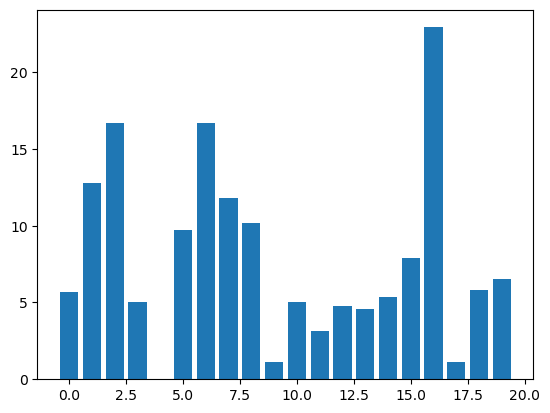

In [14]:
#Test 2
pop = ga_2d.initialization()
dez = ga_2d.translateDNA_2D(pop, X_BOUND_2D)
pred = ga_2d.F(dez)
fitness = ga_2d.get_fitness(pred)
plt.bar(np.arange(POP_SIZE), fitness)

In [8]:
parent = pop[9]
print(parent)
child = ga_2d.crossover(parent,pop)
print(child)

[0 1 0 0 0 0 0 1 1 1]
[0 1 0 0 0 0 0 1 1 1]


In [9]:
np.random.randint(10)

2

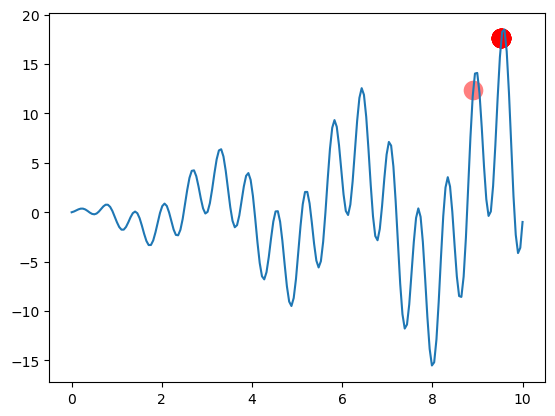

Most fitted DNA:  [1 1 1 1 0 0 1 1 1 1]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
ga_2d.evolution_2D(is_ipython=True)

# 3D Optimierung


$$
f(x, y) = \sin(\sqrt{x^2 + y^2}) + 2e^{-((x - 1)^2 + y^2)} + 3e^{-((x + 2)^2 + y^2)} - 0.5e^{-((x - 2)^2 + (y + 2)^2)}
$$


Text(0.5, 0, 'z')

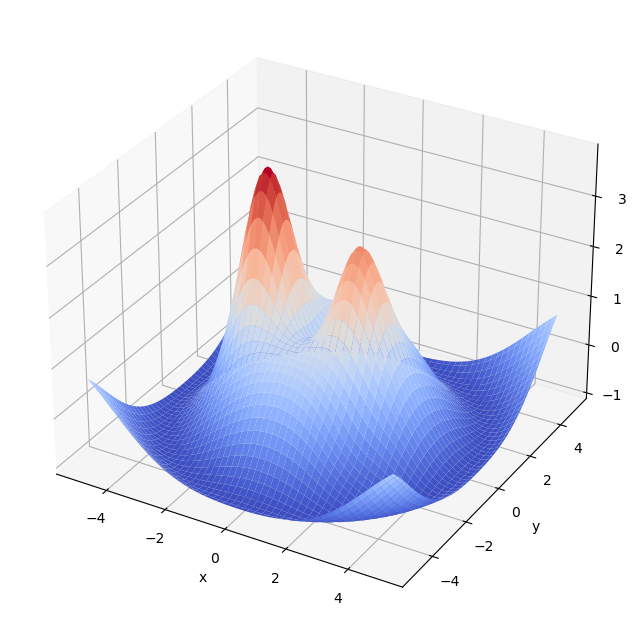

In [4]:
XY_BOUND_3D = [-5, 5]    # x y upper and lower bounds for 3D data

# to find the maximum of this function
x = np.linspace(*XY_BOUND_3D, 100)
y = np.linspace(*XY_BOUND_3D, 100)
X, Y = np.meshgrid(x, y)
def F_3D(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2)) + 2*np.exp(-((x - 1) ** 2 + y ** 2)) + 3*np.exp(-((x + 2) ** 2 + y ** 2)) - 0.5*np.exp(-((x - 2) ** 2 + (y + 2) ** 2))

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, F_3D(X, Y), cmap='coolwarm')
#ax.view_init(90, 90)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [5]:
class GeneticAlgorithm:
    def __init__(self, dna_size, pop_size, cross_rate, mutation_rate, bound, n_generations, func):
        self.dna_size = dna_size 
        self.pop_size = pop_size
        self.cross_rate = cross_rate  
        self.mutation_rate = mutation_rate 
        self.bound = bound 
        self.n_generations = n_generations 
        self.F = func #find the maximum of this function

    def initialization(self):
        ### Solution ###
        pop = np.random.randint(2, size=(self.pop_size, self.dna_size))
        return pop

    # convert binary DNA to two decimal and normalize it to a range(-5, 5)
    def translateDNA_3D(self, pop):
        dna_size_half = int(self.dna_size / 2)
        x = np.dot(pop[:, :dna_size_half], 2 ** np.arange(dna_size_half)[::-1])
        x = (x / (2 ** dna_size_half - 1)) * (self.bound[1] - self.bound[0]) - self.bound[1]
        y = np.dot(pop[:, dna_size_half:self.dna_size], 2 ** np.arange(dna_size_half)[::-1])
        y = (y / (2 ** dna_size_half - 1)) * (self.bound[1] - self.bound[0]) - self.bound[1]
        return np.vstack((x, y)).T
    
    # find non-zero fitness for selection
    def get_fitness(self, pred): 
        ### Solution ###
        return pred - np.min(pred) + 1e-3

    def select(self, pop, fitness):    # nature selection wrt pop's fitness
        ### Solution ###
        
        fit = fitness / fitness.sum()
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace = True, p = fit)
        return pop[idx]
        
        
    def crossover(self, parent, pop):     # mating process (genes crossover)
        ### Solution ###
        
        ### Single-Point Crossover ###
        
        if np.random.rand() < self.cross_rate:
            other = np.random.randint(self.pop_size)
            other_parent = pop[other]
            position = np.random.randint(self.dna_size) 
            child = np.append(parent[:position],other_parent[position:])
            return child
        else:
            return parent

    def mutate(self, child):
        ### Solution ### 
        for idx in range(2):
            for point in range(self.dna_size//2):
                if np.random.rand() < self.mutation_rate:
                    child[point] = 1 - child[point]

        return child
     
    def evolution_3D(self, is_ipython=False):
        pop = self.initialization().copy()   # initialize the pop DNA

        x = np.linspace(*self.bound, 200)
        y = np.linspace(*self.bound, 200)
        X, Y = np.meshgrid(x, y)
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.plot_surface(X, Y, self.F(X, Y), cmap='coolwarm')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        for i in range(self.n_generations):
            F_values = self.F(self.translateDNA_3D(pop)[:,0],self.translateDNA_3D(pop)[:,1])    # compute function value by extracting DNA
            # F_values+0.2 just want to show the F value in Z axis more clear
            ax.scatter(self.translateDNA_3D(pop)[:,0], self.translateDNA_3D(pop)[:,1], F_values+0.2,lw=0, c='red', alpha=0.5); 
            plt.pause(0.05) 
            # GA part (evolution)
            fitness = self.get_fitness(F_values)
            print("Most fitted DNA: ", pop[np.argmax(fitness), :])
            print("Higst value: ", self.F(self.translateDNA_3D(pop[np.argmax(fitness), :].reshape(1,-1))[:,0]
                                          ,self.translateDNA_3D(pop[np.argmax(fitness), :].reshape(1,-1))[:,1]))
            pop = self.select(pop, fitness)
            pop_copy = pop.copy()
            for parent in pop:
                child = self.crossover(parent, pop_copy)
                child = self.mutate(child)
                parent[:] = child       # parent is replaced by its child
    
    
            plt.pause(0.0001) # pause a bit so that plots are updated
            if is_ipython:
                display.display(plt.gcf())      
                if i != self.n_generations-1:
                    ax = plt.axes(projection='3d')
                    ax.plot_surface(X, Y, self.F(X, Y), cmap='coolwarm')
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('z')
                    #ax.view_init(90, 90)

                    display.clear_output(wait=True) 

In [6]:
DNA_SIZE_3D = DNA_SIZE*2
ga_3d = GeneticAlgorithm(dna_size=DNA_SIZE_3D, pop_size=POP_SIZE, cross_rate=CROSS_RATE
                    , mutation_rate=MUTATION_RATE, bound=XY_BOUND_3D, n_generations=N_GENERATIONS
                    , func=F_3D)

NameError: name 'DNA_SIZE' is not defined

In [7]:
#Test
pop = ga_3d.initialization()
dez = ga_3d.translateDNA_3D(pop)
print(dez)
print(dez[: ,0])

NameError: name 'ga_3d' is not defined

In [37]:
pred = ga_3d.F(dez[: ,0], dez[: ,1])
fitness = ga_3d.get_fitness(pred)
plt.bar(np.arange(POP_SIZE), fitness)

In [ ]:
#Compare to 2D dataset, we need larger DNA size
#first half DNA for x
#second half DNA for y

ga_3d.evolution_3D(is_ipython=True)

## (Optional) Evolution strategy (ES)
For ES, the DNA is a real number.    
For 2D dataset, we only need one real number to represent x.    
For 3D dataset, we need two real numbers to represent x and y.  

In [ ]:
DNA_SIZE_2D = 1             # DNA (real number)
DNA_SIZE_3D = 2             # DNA (real number)
N_KID = 50                  # n kids per generation

In [ ]:
class EvolutionStrategy:
    def __init__(self, dna_size, pop_size, n_kid, bound, n_generations, func):
        """
        Evolution Strategy optimization algorithm.

        Args:
            dna_size (int): The size of the DNA for each individual in the population.
            pop_size (int): The size of the population.
            n_kid (int): The number of offspring to produce in each generation.
            bound (tuple): A tuple representing the lower and upper bounds of the search space.
            n_generations (int): The number of generations for the evolutionary algorithm.
            func (function): The fitness function to optimize.

        Attributes:
            dna_size (int): The size of the DNA for each individual in the population.
            pop_size (int): The size of the population.
            n_kid (int): The number of offspring to produce in each generation.
            bound (tuple): A tuple representing the lower and upper bounds of the search space.
            n_generations (int): The number of generations for the evolutionary algorithm.
            F (function): The fitness function to optimize.

        Methods:
            initialization(): Initialize the population with random DNA values and mutation strengths.
            get_fitness(pred): Calculate the fitness of the population based on the predicted values.
            crossover(pop): Perform crossover (genes crossover) to generate offspring.
            mutate(kids): Perform mutation (change DNA based on normal distribution) on offspring.
            select(pop, fitness): Perform selection (nature selection) based on fitness ranking.

        Returns:
            None
        """
        self.dna_size = dna_size 
        self.pop_size = pop_size
        self.n_kid = n_kid  
        self.bound = bound 
        self.n_generations = n_generations 
        self.F = func #find the maximum of this function

    def initialization(self):  
        """
        Initialize the population with random DNA values and mutation strengths.

        Returns:
            dict: A dictionary containing the DNA values and mutation strengths of the population.
        """
        ### Solution ###
    
    def get_fitness(self, pred): 
        """
        Calculate the fitness of the population based on the predicted values.

        Args:
            pred (array): An array of predicted values.

        Returns:
            array: An array of fitness values.
        """
        ### Solution ###
        
        return pred + np.min(pred)
    
    def crossover(self, pop):     # mating process (genes crossover)
        """
        Perform crossover (genes crossover) to generate offspring.

        Args:
            pop (dict): A dictionary containing the DNA values and mutation strengths of the population.

        Returns:
            dict: A dictionary containing the DNA values and mutation strengths of the offspring.
        """
        
        ### Solution ###
        
        if np.random.r

    def mutate(self, kids):
        """
        Perform mutation (change DNA based on normal distribution) on offspring.

        Args:
            kids (dict): A dictionary containing the DNA values and mutation strengths of the offspring.

        Returns:
            dict: A dictionary containing the mutated DNA values and mutation strengths of the offspring.
        """
        ### Solution ###  
    
    def select(self, pop, fitness):    # nature selection wrt pop's fitness
        """
        Perform selection (nature selection) based on fitness ranking.

        Args:
            pop (dict): A dictionary containing the DNA values and mutation strengths of the population.
            fitness (array): An array of fitness values.

        Returns:
            dict: A dictionary containing the selected DNA values and mutation strengths of the population.
        """
        ### Solution ###

      
    def evolution_2D(self, is_ipython=False):
        pop = self.initialization().copy()
        x = np.linspace(*self.bound, 200)
        plt.plot(x, self.F(x))
        for i in range(self.n_generations):

            F_values = self.F(pop['DNA'][:,0])    # compute function value by extracting DNA
            sca = plt.scatter(pop['DNA'][:,0], F_values, s=200, lw=0, c='red', alpha=0.5); 
            plt.pause(0.05)

            # ES part
            kids = self.crossover(pop)
            kids = self.mutate(kids)

            # put pop and kids together
            for key in ['DNA', 'mut_strength']:
                pop[key] = np.vstack((pop[key], kids[key]))
            fitness = self.get_fitness(self.F(pop['DNA'][:,0])) 
            pop = self.select(pop, fitness) # keep some good parent for elitism

            
            plt.pause(0.0001)  # pause a bit so that plots are updated
            if is_ipython:
                display.display(plt.gcf())      
                if i != self.n_generations-1:
                    plt.plot(x, self.F(x))
                    display.clear_output(wait=True)
     
    def evolution_3D(self, is_ipython=False):
        pop = self.initialization().copy()   # initialize the pop DNA

        x = np.linspace(*self.bound, 200)
        y = np.linspace(*self.bound, 200)
        X, Y = np.meshgrid(x, y)
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = plt.axes(projection='3d')
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        ax.plot_surface(X, Y, self.F(X, Y), cmap='coolwarm')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        for i in range(self.n_generations):
            F_values = self.F(pop['DNA'][:,0],pop['DNA'][:,1])    # compute function value by extracting DNA
            # F_values+0.2 just want to show the F value in Z axis more clear
            ax.scatter(pop['DNA'][:,0], pop['DNA'][:,1], F_values+0.2,lw=0, c='red', alpha=0.5); 
            plt.pause(0.05) 
            
            # ES part
            kids = self.crossover(pop)
            kids = self.mutate(kids)

            # put pop and kids together
            for key in ['DNA', 'mut_strength']:
                pop[key] = np.vstack((pop[key], kids[key]))
            fitness = self.get_fitness(self.F(pop['DNA'][:,0],pop['DNA'][:,1])) 
            pop = self.select(pop, fitness) # keep some good parent for elitism
                        
            plt.pause(0.0001) # pause a bit so that plots are updated
            if is_ipython:
                display.display(plt.gcf())      
                if i != self.n_generations-1:
                    ax = plt.axes(projection='3d')
                    ax.plot_surface(X, Y, self.F(X, Y), cmap='coolwarm')
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('z')
                    #ax.view_init(90, 90)

                    display.clear_output(wait=True) 

### 2.1 Finding the max value on the 2D dataset based on ES

In [ ]:
es_2d = EvolutionStrategy(dna_size=DNA_SIZE_2D, pop_size=POP_SIZE, n_kid=N_KID, bound=X_BOUND_2D, n_generations=N_GENERATIONS
                        , func=F_2D)
es_2d.evolution_2D(is_ipython=True)

### 2.2 Finding the max value on the 3D dataset based on ES

In [ ]:
es_3d = EvolutionStrategy(dna_size=DNA_SIZE_3D, pop_size=POP_SIZE, n_kid=N_KID, bound=XY_BOUND_3D, n_generations=N_GENERATIONS
                        , func=F_3D)
es_3d.evolution_3D(is_ipython=True)